In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import os
walk = os.walk('data/ml-25m')
root, dirs, files = next(walk)
files


['links.csv',
 'tags.csv',
 'genome-tags.csv',
 'ratings.csv',
 'README.txt',
 'genome-scores.csv',
 'movies.csv']

In [4]:
#load dataset
ml_links = pd.read_csv('data/ml-25m/links.csv')
ml_tags = pd.read_csv('data/ml-25m/tags.csv')
ml_Gtags = pd.read_csv('data/ml-25m/genome-tags.csv')
ml_ratings = pd.read_csv('data/ml-25m/ratings.csv')
ml_Gscores = pd.read_csv('data/ml-25m/genome-scores.csv')
ml_movies = pd.read_csv('data/ml-25m/movies.csv')

### movies.csv

In [34]:
# ml_movies = pd.read_csv('data/ml-25m/movies.csv')

#clear year from title
ml_movies['title'] = ml_movies['title'].str.split('(').str[0]
#genre dummy up
ml_movies= pd.concat([ml_movies.drop('genres', axis=1), ml_movies.genres.str.get_dummies(sep='|')], axis=1) 
ml_movies.tail()


,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
62418,209157,We,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62419,209159,Window of the Soul,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62420,209163,Bad Poems,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
62421,209169,A Girl Thing,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62422,209171,Women of Devil's Island,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ratings.csv

In [3]:
#load data as DataFrame
ml_ratings = pd.read_csv('data/ml-25m/ratings.csv')
#ratings

ml_ratings.head()


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
#transform timestamp into human-readable format & split into Y/M/D
ml_ratings['timestamp'] = ml_ratings['timestamp'].apply(datetime.fromtimestamp)
ml_ratings['year'] = ml_ratings['timestamp'].dt.year
ml_ratings['month'] = ml_ratings['timestamp'].dt.month
ml_ratings['date'] = ml_ratings['timestamp'].dt.date
ml_ratings = ml_ratings.sort_values('timestamp').reset_index(drop=True)

In [5]:
ml_ratings.head()

,userId,movieId,rating,timestamp,year,month,date
0,2262,21,3.0,1995-01-09 19:46:49,1995,1,1995-01-09
1,2262,1079,3.0,1995-01-09 19:46:49,1995,1,1995-01-09
2,2262,47,5.0,1995-01-09 19:46:49,1995,1,1995-01-09
3,102689,1,4.0,1996-01-29 08:00:00,1996,1,1996-01-29
4,102689,39,5.0,1996-01-29 08:00:00,1996,1,1996-01-29


In [6]:
#see the descriptibe statistic of ml_ratings
print('Years:', ml_ratings.year.unique())
print('Months', ml_ratings.month.unique())
print('#Unique users:', ml_ratings.userId.nunique())
print('#Unique movies:', ml_ratings.movieId.nunique())
print('Unique ratings:', ml_ratings.rating.unique())
print('Average rating:', round(ml_ratings.rating.mean(), 2))
print('Frequency of each rating value:')
print(ml_ratings['rating'].value_counts())

Years: [1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
Months [ 1  2  3  4  5  6  7  8  9 10 11 12]
#Unique users: 162541
#Unique movies: 59047
Unique ratings: [3.  5.  4.  1.  2.  4.5 3.5 1.5 0.5 2.5]
Average rating: 3.53
Frequency of each rating value:
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64


In [7]:
#manage the range of rating num each year
ml_ratings[['year', 'rating']].groupby(['year']).count()

,rating
year,
1995,3
1996,1429280
1997,626849
1998,272153
1999,1056161
2000,1737245
2001,1057762
2002,777868
2003,920780


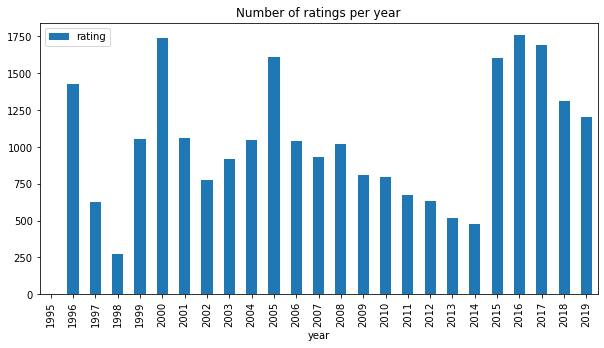

In [8]:
ml_ratings[['year', 'rating']].groupby(['year']).count().div(1000).reset_index().plot.bar(x='year', y='rating', title='Number of ratings per year', figsize=(10, 5));

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


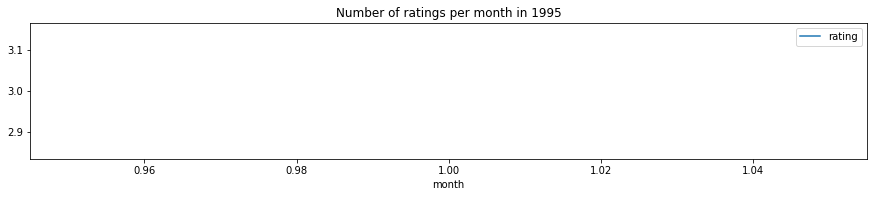

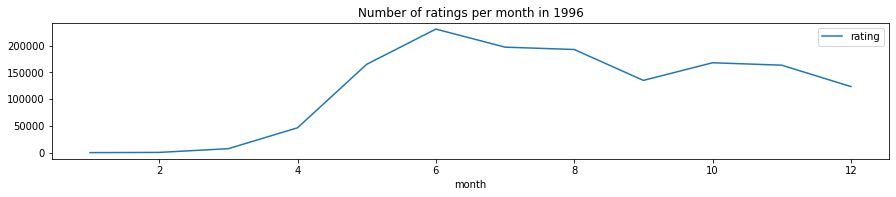

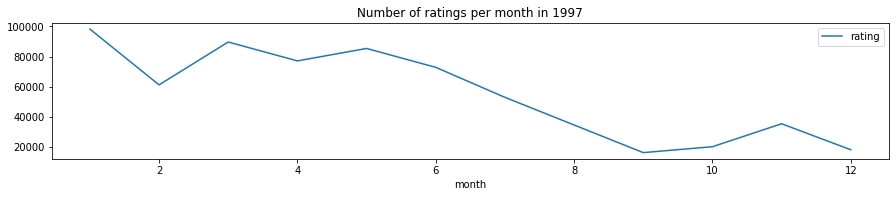

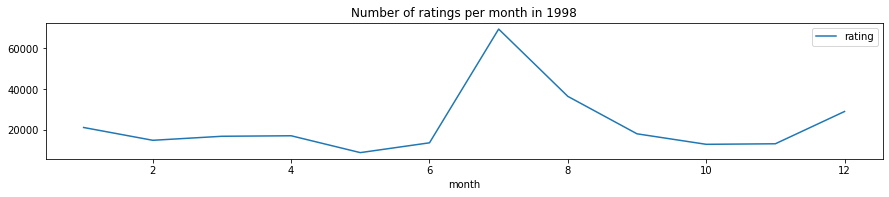

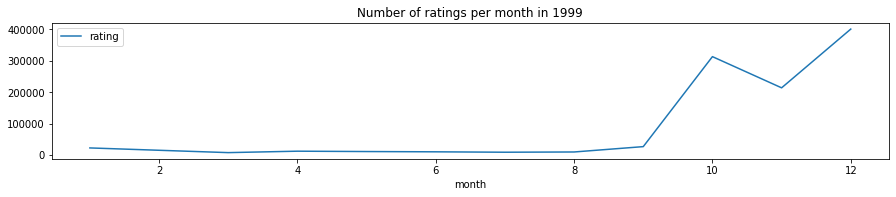

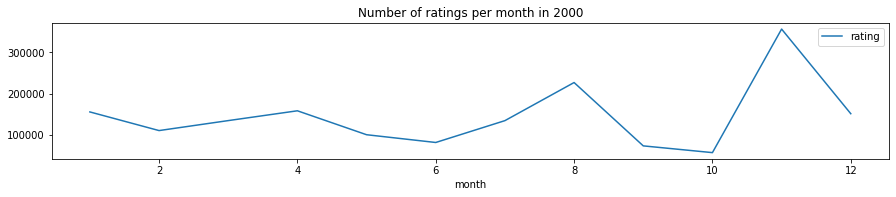

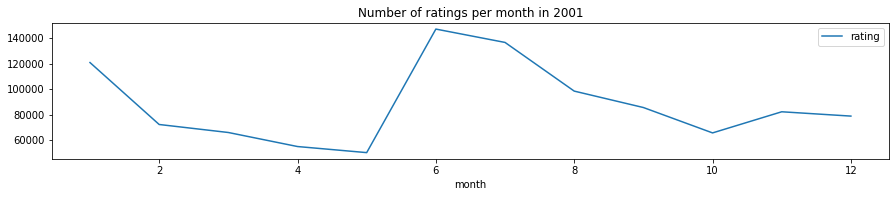

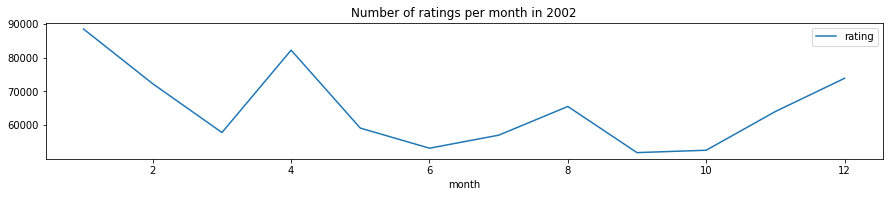

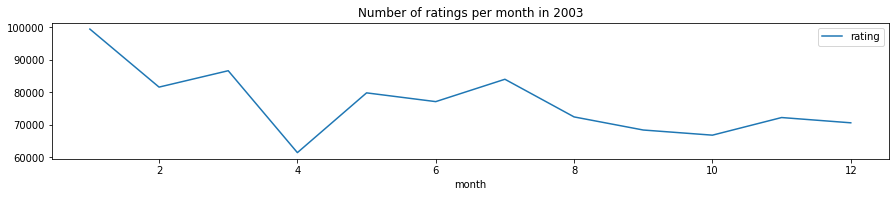

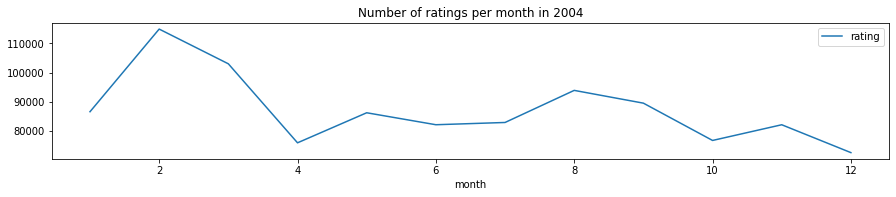

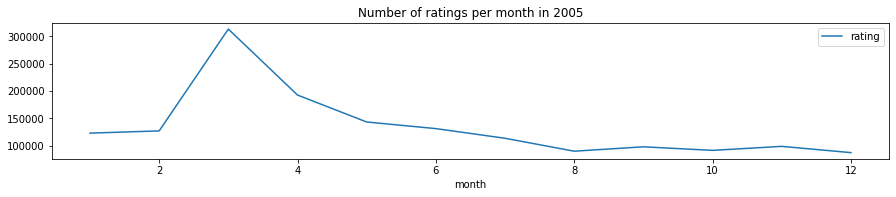

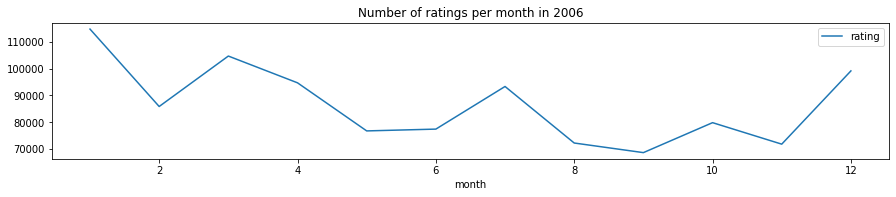

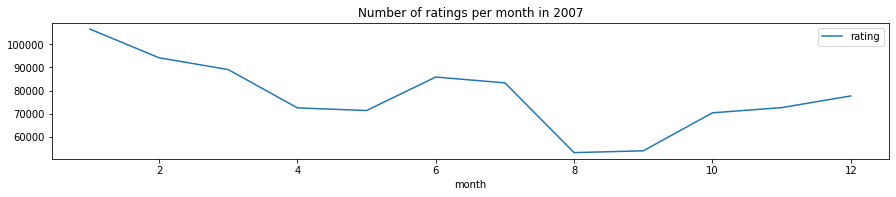

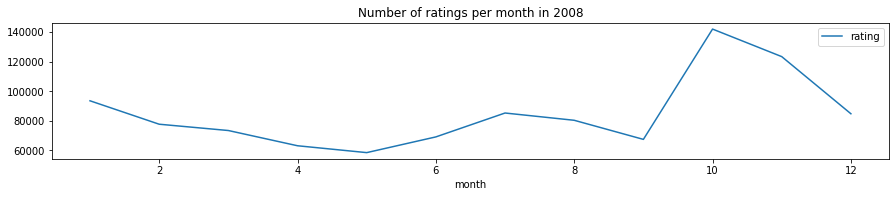

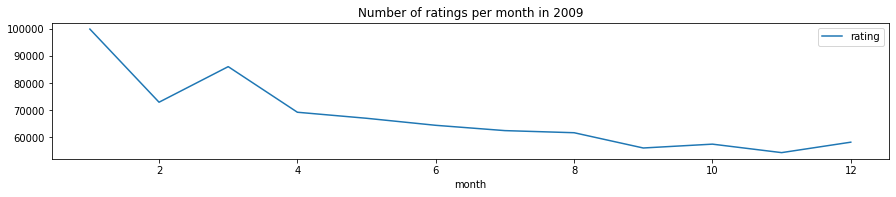

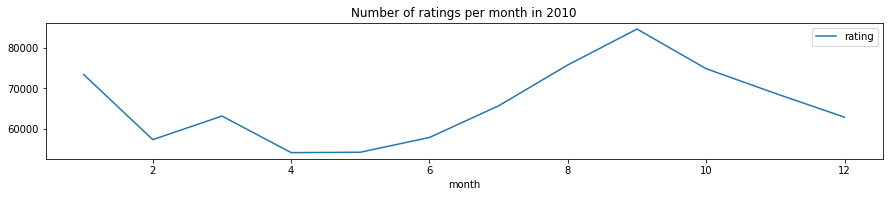

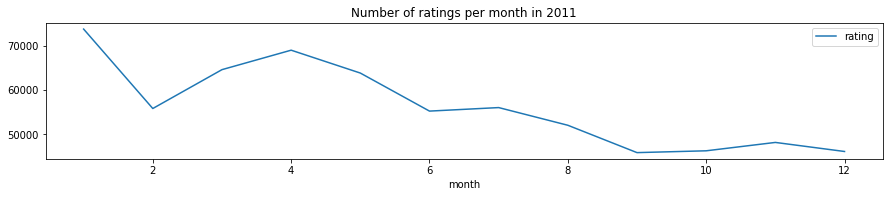

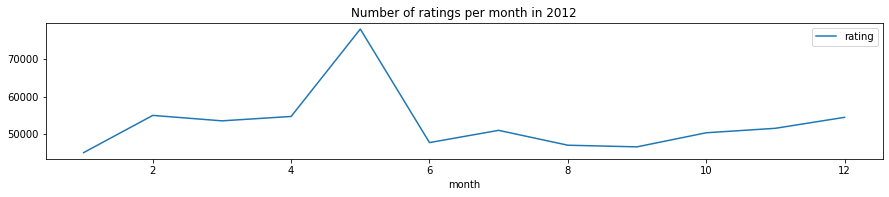

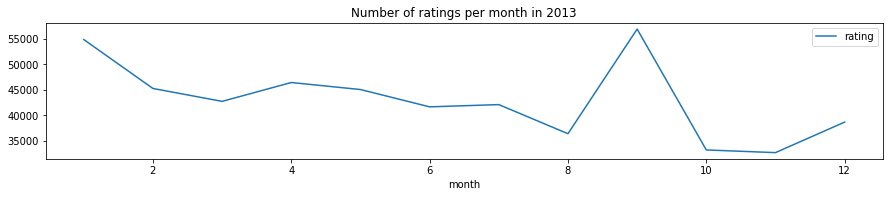

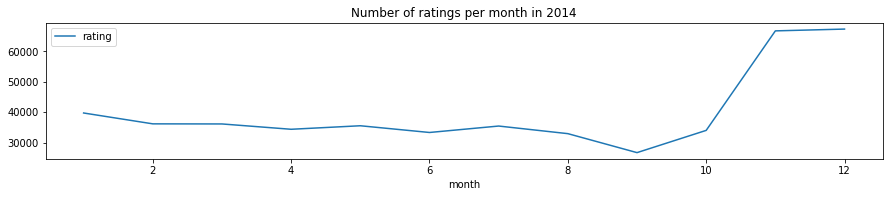

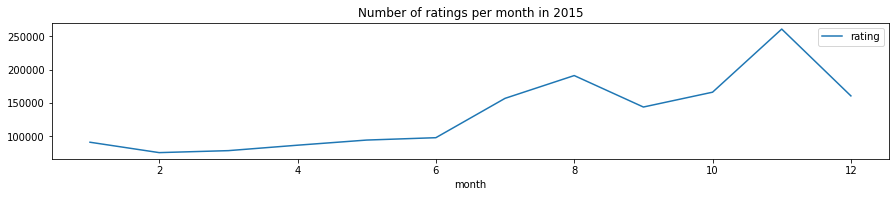

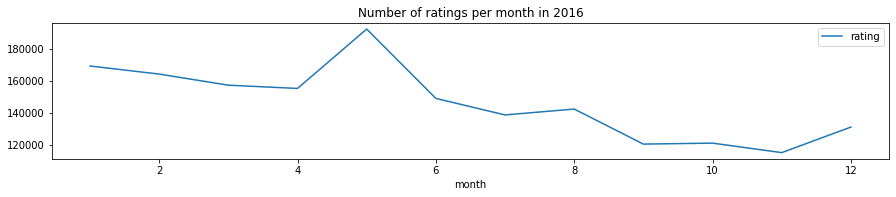

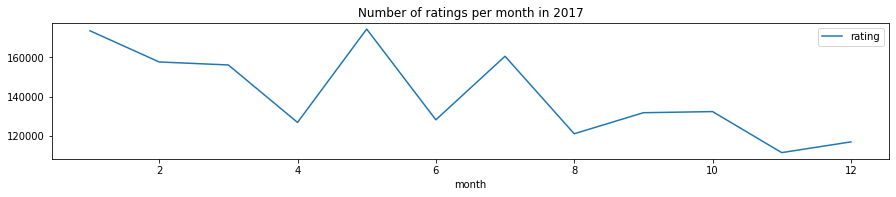

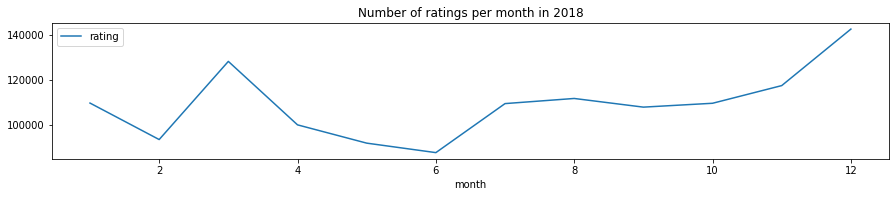

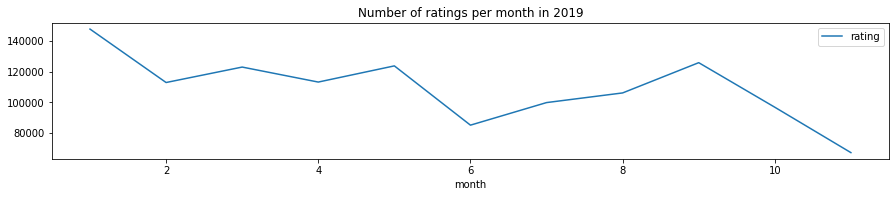

In [9]:
#see which month throughout the year got more numbers of rating

# 2015-2019 mid-of-year & end-of-year(beginning-of-year)

pattern = ml_ratings[['year', 'month', 'rating']].groupby(['year', 'month']).count().reset_index()
for year in pattern['year'].unique():
    pattern.loc[pattern['year'] == year].plot('month', 'rating', title='Number of ratings per month in %s' %year, figsize=(15, 2.5))

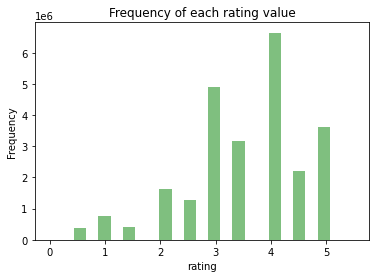

In [11]:
#see overall fequency of each rating value
bins = np.linspace(0, 5.5, 26)
plt.hist(ml_ratings['rating'], bins, alpha = 0.5, color = 'g')
plt.title("Frequency of each rating value")
plt.xlabel("rating")
plt.ylabel("Frequency")
plt.show()

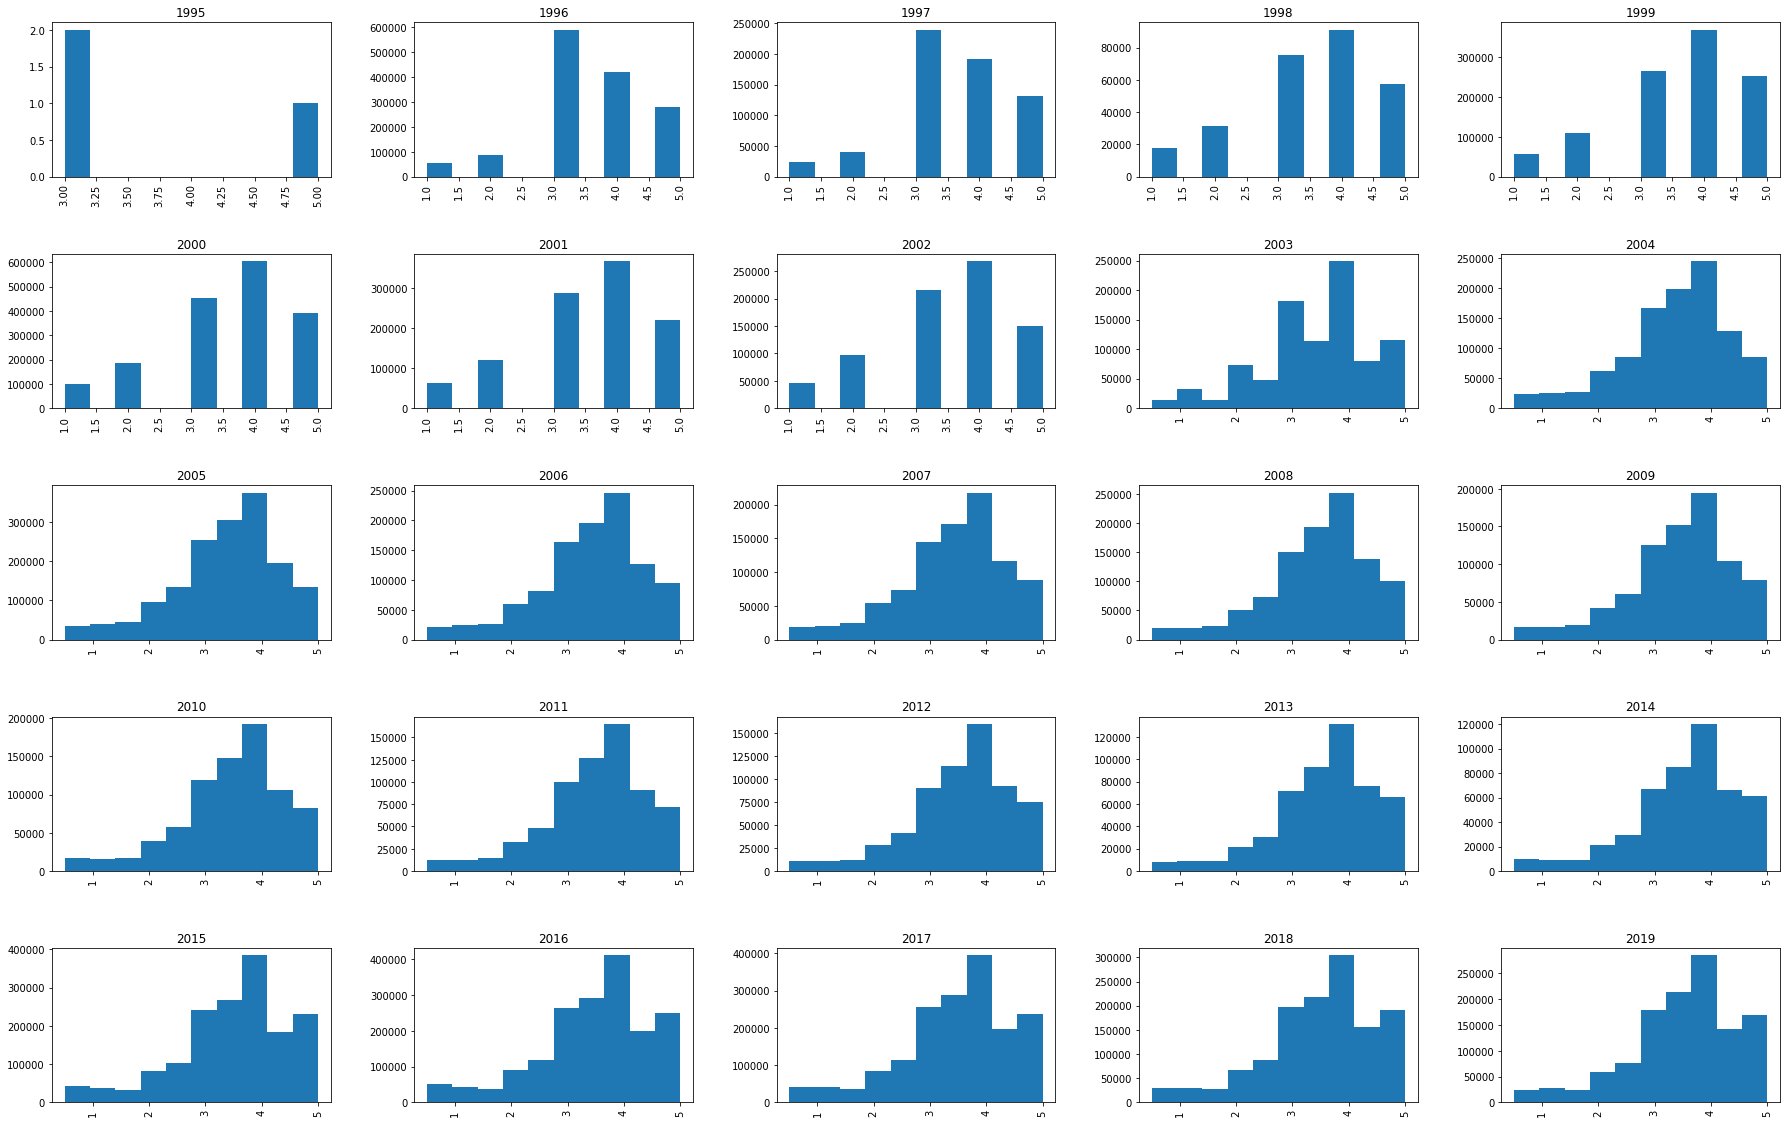

In [12]:
#similar rating distribution over years(1995-2019)
ml_ratings['rating'].hist(by=ml_ratings['year'], figsize=(30, 20));

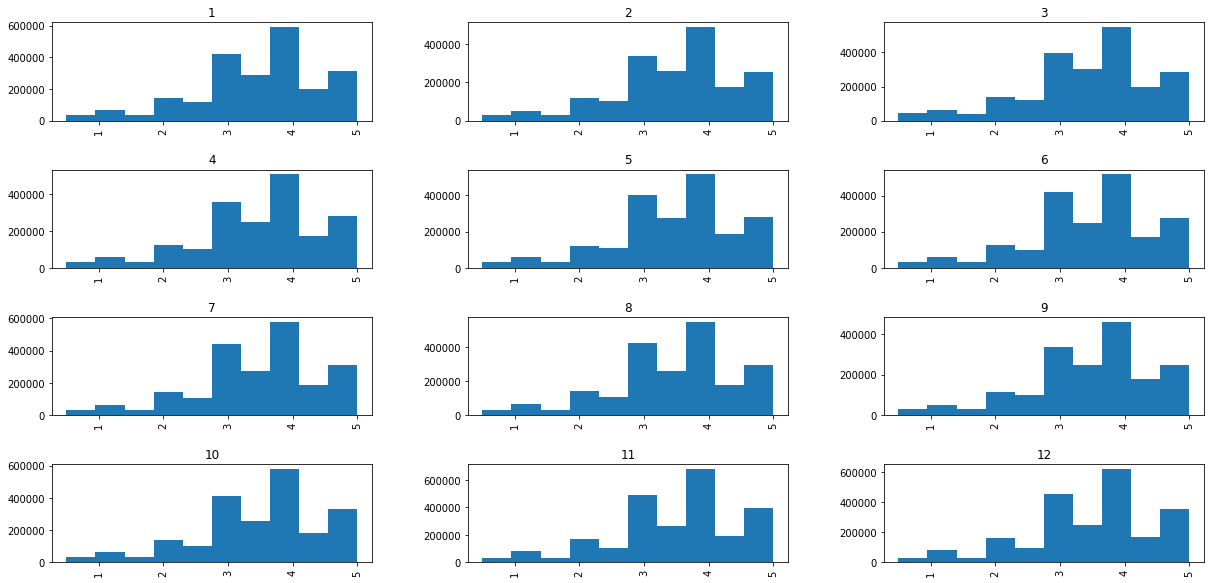

In [13]:
ml_ratings['rating'].hist(by=ml_ratings['month'], figsize=(20, 10));

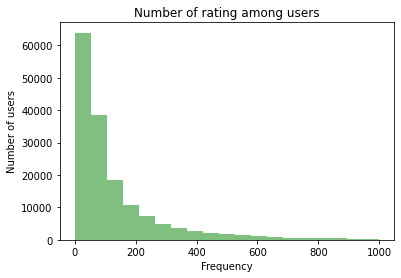

In [14]:
# most users have 0-200 reviews 

bins = np.linspace(0, 1000, 20)
plt.hist(ml_ratings['userId'].value_counts() ,bins, alpha = 0.5, color = 'g')
plt.title("Number of rating among users")
plt.xlabel("Frequency")
plt.ylabel("Number of users")
plt.show()

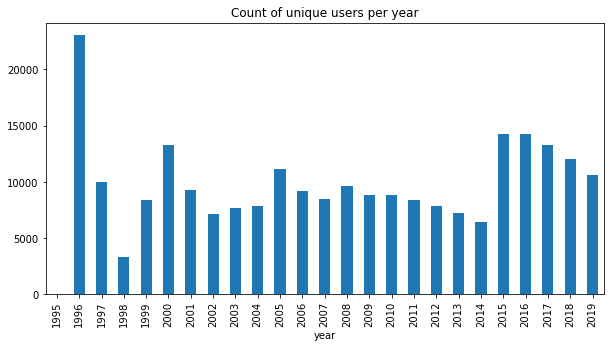

In [15]:
#user numbers over the years
#clearly we might want to leave out data from 1995 

ml_ratings[['year', 'userId']].groupby(['year'])['userId'].nunique().plot.bar(x='year', y='userId', title='Count of unique users per year', figsize=(10, 5));

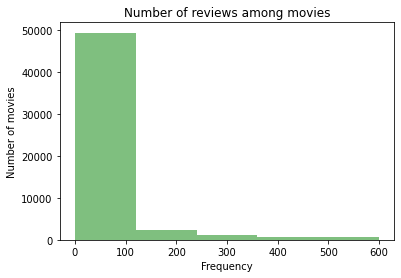

In [16]:
#most movies had at least 100 ratings
bins = np.linspace(0, 600,6)
plt.hist(ml_ratings['movieId'].value_counts() ,bins, alpha = 0.5, color = 'g')
plt.title("Number of reviews among movies")
plt.xlabel("Frequency")
plt.ylabel("Number of movies")
plt.show()

# ml_ratings['movieId'].value_counts().hist(figsize=(10, 5));

### tags.csv

In [41]:
ml_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [50]:
ml_movies.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
merge_Movie_Tags= pd.merge(ml_movies, ml_tags)
merge_Movie_Tags.head(100)


,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,tag,timestamp
0,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,791,Owned,1515175493
1,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1048,imdb top 250,1172144394
2,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1361,Pixar,1216146311
3,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,3164,Pixar,1223304727
4,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,3164,time travel,1223304729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,20346,humorous,1312088973
96,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,20346,Pixar,1312088967
97,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,20346,time travel,1312088989
98,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,21096,Pixar,1244766522


In [51]:
ml_Gscores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [ ]:
#跑不動 RAM爆掉了ＱＱ
merge_Movie_Tags_relevance= pd.merge(merge_Movie_Tags, ml_Gscores)
merge_Movie_Tags_relevance

In [5]:
#tags across users with uppcase
all_pixar= ml_tags['tag']== 'Pixar'
ml_tags[all_pixar]


,userId,movieId,tag,timestamp
1251,449,187541,Pixar,1529192116
4226,1361,1,Pixar,1216146311
5051,1604,2355,Pixar,1139736183
5331,1694,177765,Pixar,1561410603
5670,1822,8961,Pixar,1472681520
...,...,...,...,...
1088059,161172,4886,Pixar,1159534061
1088061,161172,6377,Pixar,1159534060
1088063,161172,45517,Pixar,1159534105
1090948,161557,95167,Pixar,1370359098


In [46]:
ml_Gtags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [47]:
Pixar = ml_Gtags['tag']== 'pixar'
ml_Gtags[Pixar]

,tagId,tag
784,785,pixar


In [2]:
ml_Gscores = pd.read_csv('data/ml-25m/genome-scores.csv')
ml_Gscores

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [ ]:
mask= ml_Gscores['movieId']== 1 &
ml_Gscores[mask]